In [2]:
import seaborn as sns 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
tc=pd.read_csv("Kayla Brock - jemison_spreadsheet_exercises - Table1_CustDetails (1).csv")

In [4]:
tc

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.60,593.30,No,9.0
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.90,542.40,No,9.1
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.90,280.85,Yes,3.8
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.00,1237.85,Yes,12.6
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.90,267.40,Yes,3.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,9987-LUTYD,Female,0,No,No,1,1,1,Mailed check,55.15,742.90,No,13.5
7045,9992-RRAMN,Male,0,Yes,No,2,2,0,Electronic check,85.10,1873.70,Yes,22.0
7046,9992-UJOEL,Male,0,No,No,1,1,0,Mailed check,50.30,92.75,No,1.8
7047,9993-LHIEB,Male,0,Yes,Yes,1,1,2,Mailed check,67.85,4627.65,No,68.2


# Goal

### Find and make one change/recommendation that can be made to reduce churn. (i.e. find a driver of churn and make a recommendation for change.)

# Reducing Customer Churn 

### Possibilities

Churn Vs. Tenure 

<AxesSubplot:xlabel='tenure'>

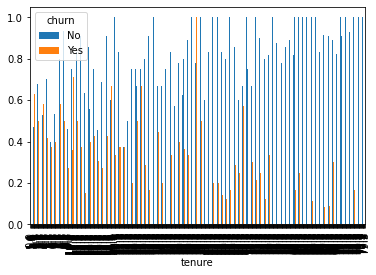

In [13]:
pd.crosstab(tc.tenure, tc.churn, normalize="index").plot.bar()

Churn Vs. Monthly Charges 

<AxesSubplot:xlabel='monthly_charges'>

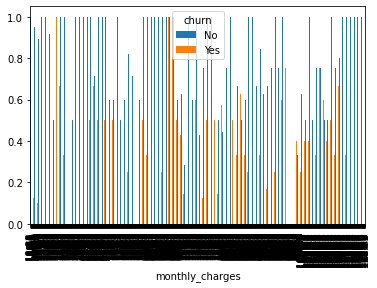

In [21]:
pd.crosstab(tc.monthly_charges, tc.churn, normalize="index").plot.bar()

In [44]:
tc['monthly_charges'].median()

70.35

In [45]:
tc['monthly_charges'].mode()

0    20.05
dtype: float64

In [46]:
tc['monthly_charges'].min()

18.25

In [47]:
tc['monthly_charges'].max()

118.75

Churn Vs. Payment Type 

In [15]:
pd.crosstab(tc.payment_type, tc.churn, normalize="index")


churn,No,Yes
payment_type,,
Bank transfer (automatic),0.832687,0.167313
Credit card (automatic),0.847769,0.152231
Electronic check,0.547146,0.452854
Mailed check,0.808933,0.191067


Text(0.5, 1.0, 'Churn by Payment Type')

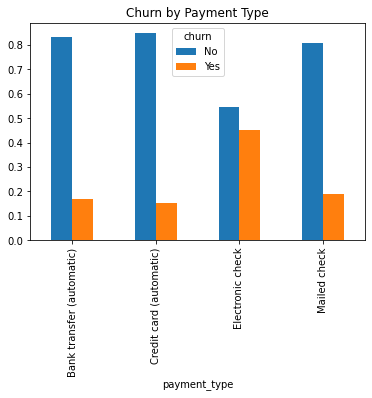

In [9]:

pd.crosstab(tc.payment_type, tc.churn, normalize="index").plot.bar()
plt.title("Churn by Payment Type")

Churn Vs. Contract Type 

In [16]:
pd.crosstab(tc.contract_type, tc.churn, normalize="index")

churn,No,Yes
contract_type,,
0,0.572755,0.427245
1,0.887534,0.112466
2,0.971715,0.028285


Text(0.5, 1.0, 'Churn by Length of Contract')

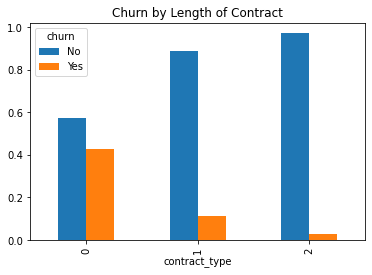

In [130]:
pd.crosstab(tc.contract_type, tc.churn, normalize="index").plot.bar()
plt.title("Churn by Length of Contract")

Churn Vs. Internet Service 

<AxesSubplot:xlabel='internet_service'>

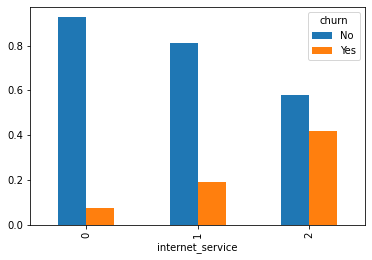

In [23]:
pd.crosstab(tc.internet_service, tc.churn, normalize="index").plot.bar()

Churn Vs. Phone Service 

<AxesSubplot:xlabel='phone_service'>

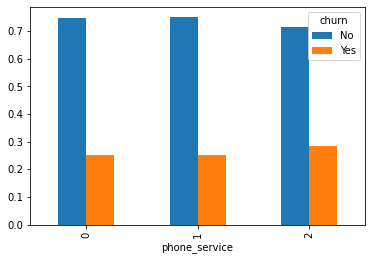

In [25]:
pd.crosstab(tc.phone_service, tc.churn, normalize="index").plot.bar()

Churn Vs. Dependents 

<AxesSubplot:xlabel='dependents'>

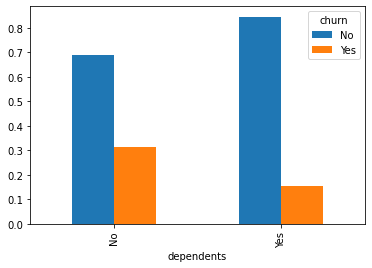

In [26]:
pd.crosstab(tc.dependents, tc.churn, normalize="index").plot.bar()

Churn Vs. Partner

<AxesSubplot:xlabel='partner'>

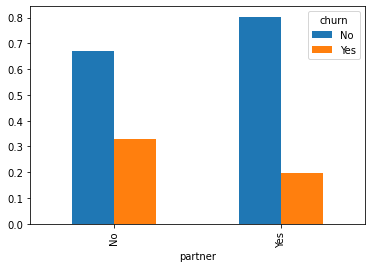

In [27]:
pd.crosstab(tc.partner, tc.churn, normalize="index").plot.bar()

Churn Vs. Senior Citizen 

### Hypothesis seniors who carry only one or two phone lines with us are leaving

Seniors are churning at a rate of 41.6%

In [85]:
seniorchurn = pd.crosstab(tc.is_senior_citizen, tc.churn, normalize="index")
seniorchurn

churn,No,Yes
is_senior_citizen,,
0,0.764009,0.235991
1,0.583187,0.416813


### While it is not possible to know, based on the data shown here, how much of this churn is related to senior deaths. We do know this:

Deaths per 100,000 population:

 65-74: 2,072.3

75-84: 4,997.0

85 and over: 15,210.9

National Vital Statistics System – Mortality Data (2020) via CDC WONDER

Life expectancy at age 65 : 19.6 years

https://www.cdc.gov/nchs/fastats/older-american-health.htm

The 85 and older population is projected to more than double from 6.5 million in
2018 to 14.4 million in 2040 (a 123% increase)

https://acl.gov/sites/default/files/Aging%20and%20Disability%20in%20America/2019ProfileOlderAmericans508.pdf

<AxesSubplot:xlabel='is_senior_citizen'>

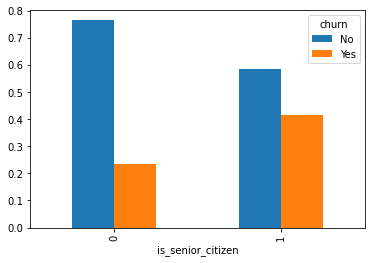

In [28]:
pd.crosstab(tc.is_senior_citizen, tc.churn, normalize="index").plot.bar()

In [89]:
tc[['is_senior_citizen', 'payment_type']]

,is_senior_citizen,payment_type
0,0,Mailed check
1,0,Mailed check
2,0,Electronic check
3,1,Electronic check
4,1,Mailed check
...,...,...
7044,0,Mailed check
7045,0,Electronic check
7046,0,Mailed check
7047,0,Mailed check


In [12]:
only_seniors = tc[tc['is_senior_citizen']== 1]
only_seniors

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn,tenure
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.00,1237.85,Yes,12.6
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.90,267.40,Yes,3.2
6,0013-SMEOE,Female,1,Yes,No,1,2,2,Bank transfer (automatic),109.70,7904.25,No,72.1
8,0015-UOCOJ,Female,1,No,No,1,1,0,Electronic check,48.20,340.35,No,7.1
17,0021-IKXGC,Female,1,No,No,2,2,0,Electronic check,72.10,72.10,No,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7020,9961-JBNMK,Male,1,No,No,1,2,0,Bank transfer (automatic),96.80,2030.30,Yes,21.0
7023,9965-YOKZB,Male,1,No,No,2,2,0,Electronic check,83.85,790.15,Yes,9.4
7027,9971-ZWPBF,Male,1,Yes,Yes,2,2,0,Electronic check,108.90,3625.20,No,33.3
7030,9972-VAFJJ,Female,1,Yes,No,1,2,1,Electronic check,94.00,4871.45,No,51.8


In [13]:
senior_payments = only_seniors.payment_type.value_counts()
senior_payments

Electronic check             594
Bank transfer (automatic)    233
Credit card (automatic)      221
Mailed check                  94
Name: payment_type, dtype: int64

Text(0.5, 1.0, 'Senior Payments')

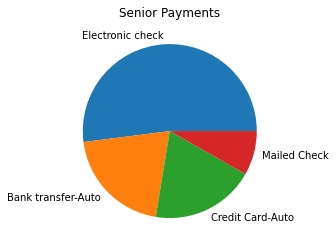

In [14]:
labels = ['Electronic check', 'Bank transfer-Auto', 'Credit Card-Auto', 'Mailed Check']
plt.pie(senior_payments, labels = labels)
plt.title("Senior Payments")

In [110]:
senior_phonelines = only_seniors.phone_service.value_counts()
senior_phonelines

2    665
1    373
0    104
Name: phone_service, dtype: int64

In [111]:
senior_internetlines = only_seniors.internet_service.value_counts()
senior_internetlines

2    831
1    259
0     52
Name: internet_service, dtype: int64

In [113]:
senior_monthly = only_seniors.monthly_charges.value_counts().sort_values()
senior_monthly

(115, 125]     12
(25, 35]       40
(35, 45]       40
(15, 25]       47
(55, 65]       49
(45, 55]       66
(105, 115]    111
(65, 75]      157
(75, 85]      181
(85, 95]      214
(95, 105]     225
Name: monthly_charges, dtype: int64

In [125]:
tc2 = tc.groupby(['churn']).agg('monthly_charges')
tc2

In [119]:
senior_tenure = only_seniors.tenure.value_counts().sort_values()
senior_tenure

(3, 4]       24
(1, 2]       26
(2, 3]       30
(4, 5]       34
(0, 1]       86
(5, 100]    942
Name: tenure, dtype: int64

Text(0.5, 1.0, 'Senior Citizen Tenure')

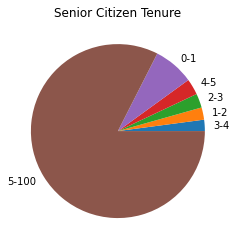

In [121]:
labels = ['3-4', '1-2', '2-3', '4-5', '0-1', '5-100']
plt.pie(senior_tenure, labels = labels)
plt.title("Senior Citizen Tenure")

In [127]:
senior_contracts = only_seniors.contract_type.value_counts()
senior_contracts

0    807
1    190
2    145
Name: contract_type, dtype: int64

Text(0.5, 1.0, 'Senior Citizen Contracts')

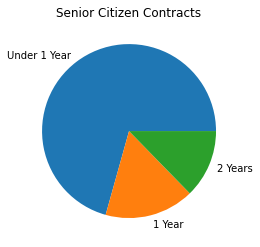

In [129]:
labels = ['Under 1 Year', '1 Year', '2 Years']
plt.pie(senior_contracts, labels = labels)
plt.title("Senior Citizen Contracts")

### 58% of our senior citizen customers have two lines of phone service with us

In [71]:
pd.crosstab(tc.is_senior_citizen, tc.phone_service, normalize="index")


phone_service,0,1,2
is_senior_citizen,,,
0,0.098019,0.511596,0.390384
1,0.091068,0.326620,0.582312


<AxesSubplot:xlabel='is_senior_citizen'>

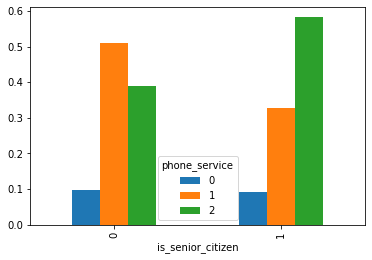

In [69]:
pd.crosstab(tc.is_senior_citizen, tc.phone_service, normalize="index").plot.bar()

### Only 4% of our senior citizen customers do not have at least one line of internet service with us

In [72]:
pd.crosstab(tc.is_senior_citizen, tc.internet_service, normalize="index")

internet_service,0,1,2
is_senior_citizen,,,
0,0.250042,0.366176,0.383782
1,0.045534,0.226795,0.727671


### Over 70% of our senior citizen customers have no contract with us

In [74]:
pd.crosstab(tc.is_senior_citizen, tc.contract_type, normalize="index")

contract_type,0,1,2
is_senior_citizen,,,
0,0.519553,0.217708,0.262739
1,0.706655,0.166375,0.126970


### We also know from our total population of customers, that customers without contracts are much more likely to churn than those with one or two year contracts

In [86]:
pd.crosstab(tc.contract_type, tc.churn, normalize="index")

churn,No,Yes
contract_type,,
0,0.572755,0.427245
1,0.887534,0.112466
2,0.971715,0.028285


### We also know customers who AUTOPAY are much more likely to stay with us

In [87]:
pd.crosstab(tc.payment_type, tc.churn, normalize="index")

churn,No,Yes
payment_type,,
Bank transfer (automatic),0.832687,0.167313
Credit card (automatic),0.847769,0.152231
Electronic check,0.547146,0.452854
Mailed check,0.808933,0.191067


In [62]:
tc.is_senior_citizen.sum()


1142

Churn Vs. Gender 

<AxesSubplot:xlabel='gender'>

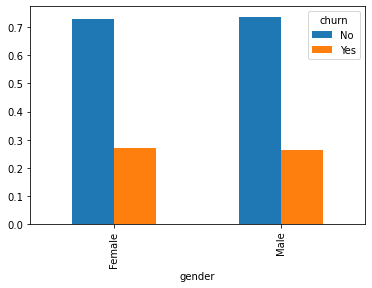

In [29]:
pd.crosstab(tc.gender, tc.churn, normalize="index").plot.bar()

# START HERE

Like many of you, as I drive to work each day, I think about the TC business model. Who are we serving? Are we doing a good job? Yes, we want to make money, but also, how can we dig deep to create win-win situations? 
The data we are going to look at today is focused in on every business' model's objective: profitability. Like every businesses we continuously challenge ourselves to acquire new customers while retaining our customer base. 
Like myself, I know many people in this room have stared at these numbers. The angle I am going to pitch today is zeroeing in one, I would argue very special, subset of our customer base: 
senior citizens. 

What do we know about senior citizens? 

In the U.S. the population age 65 and older numbered 54.1 million in 2019
(the most recent year for which data are available). They represented 16% of
the population, more than one in every seven Americans. The number of older
Americans has increased by 14.4 million (or 36%) since 2009, compared to an
increase of 3% for the under-65 population.

https://acl.gov/sites/default/files/Aging%20and%20Disability%20in%20America/2020ProfileOlderAmericans.Final_.pdf

Smartphone ownership among seniors varies substantially by age: 59% of 65- to 69-year-olds own smartphones, but that share falls to 49% among 70- to 74-year-olds. Smartphone adoption drops off considerably among adults in their mid-70s and beyond. Some 31% of 75- to 79-year-olds say they own smartphones, while only 17% of those ages 80 and older are smartphone owners.

https://www.pewresearch.org/internet/2017/05/17/technology-use-among-seniors/#:~:text=Smartphone%20ownership%20among%20seniors%20varies,their%20mid%2D70s%20and%20beyond.

Just 14% of adults over 65 have dumped their landlines, though

https://time.com/2966515/landline-phones-cell-phones/

### We also know, with our current offerings, it is a demographic we are not attracting. 

Text(0.5, 1.0, 'Senior Citizen Customers')

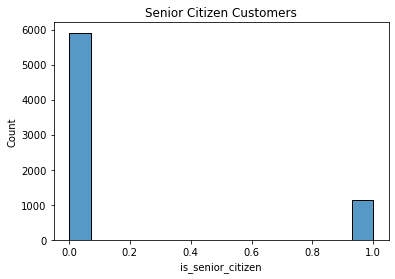

In [54]:
sns.histplot(tc.is_senior_citizen)
plt.title("Senior Citizen Customers")

# I need to fix this chart somehow or add an annotation

### We also know, of the seniors we do have, many are leaving. . . 

<AxesSubplot:xlabel='is_senior_citizen'>

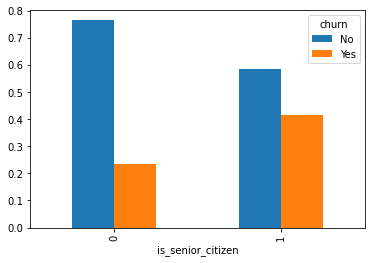

In [52]:
pd.crosstab(tc.is_senior_citizen, tc.churn, normalize="index").plot.bar()

In [68]:
tc.is_senior_citizen.sum()

1142

Step 1: Attracting them 

We already have one of the most reliable networks in the country. Let's talk about how we can use this, to keep our customers while (hopefully) attracting new customers 

### Senior Friendly Phones 

We already have an excellent product line of smart phones for our tech savvy seniors. I would also like to propose adding more senior-friendly phone options. We should offer rock bottom pricing for senior citizen customers who are willing to sign a 2 year contract with us. More than likely, the high tech seniors are also the younger seniors. If we can retain these customers, we can expect they will be with us for another 19 years. 

To add an additional incentive we will offer a 5 dollar per line discount monthly for senior citizen customers who enroll in autopay. 